# Token lengths analysis

## Read bed files

In [1]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files')

bedDfList = []
for bedFile in os.listdir(bedDir):
    bedDfList.append(pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score']))

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score
0,1,0,6,ATATTTG,0.006514
1,1,7,12,ATTTAT,-0.001371
2,1,13,19,CTTTTTT,0.001677
3,1,20,24,CATAA,-0.009932
4,1,25,31,TTCTTCT,-0.006813
...,...,...,...,...,...
537799,26,113,115,CGT,-0.026195
537800,26,116,123,TTAACTTT,0.016284
537801,26,124,131,TGTTGTTG,0.020886
537802,26,132,136,ACCAT,-0.021129


## Calculate contig lengths

In [3]:
bedDf['token_length'] = (bedDf.end_position - bedDf.start_position)
bedDf

,contig_id,start_position,end_position,tokens,score,token_length
0,1,0,6,ATATTTG,0.006514,6
1,1,7,12,ATTTAT,-0.001371,5
2,1,13,19,CTTTTTT,0.001677,6
3,1,20,24,CATAA,-0.009932,4
4,1,25,31,TTCTTCT,-0.006813,6
...,...,...,...,...,...,...
537799,26,113,115,CGT,-0.026195,2
537800,26,116,123,TTAACTTT,0.016284,7
537801,26,124,131,TGTTGTTG,0.020886,7
537802,26,132,136,ACCAT,-0.021129,4


## Plot

<Axes: xlabel='token_length', ylabel='Count'>

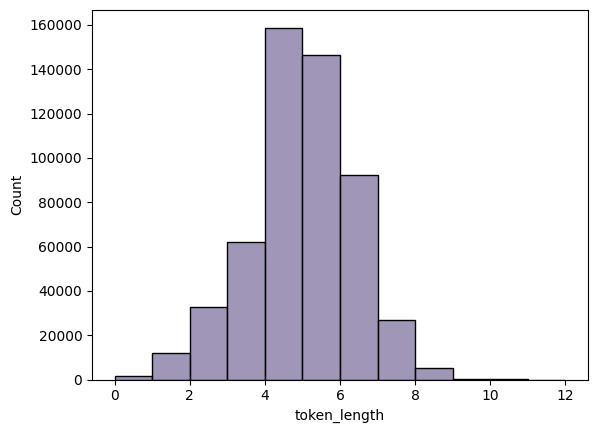

In [4]:
import seaborn as sns


sns.histplot(data=bedDf, x='token_length', binwidth=1, color='#8174A0')

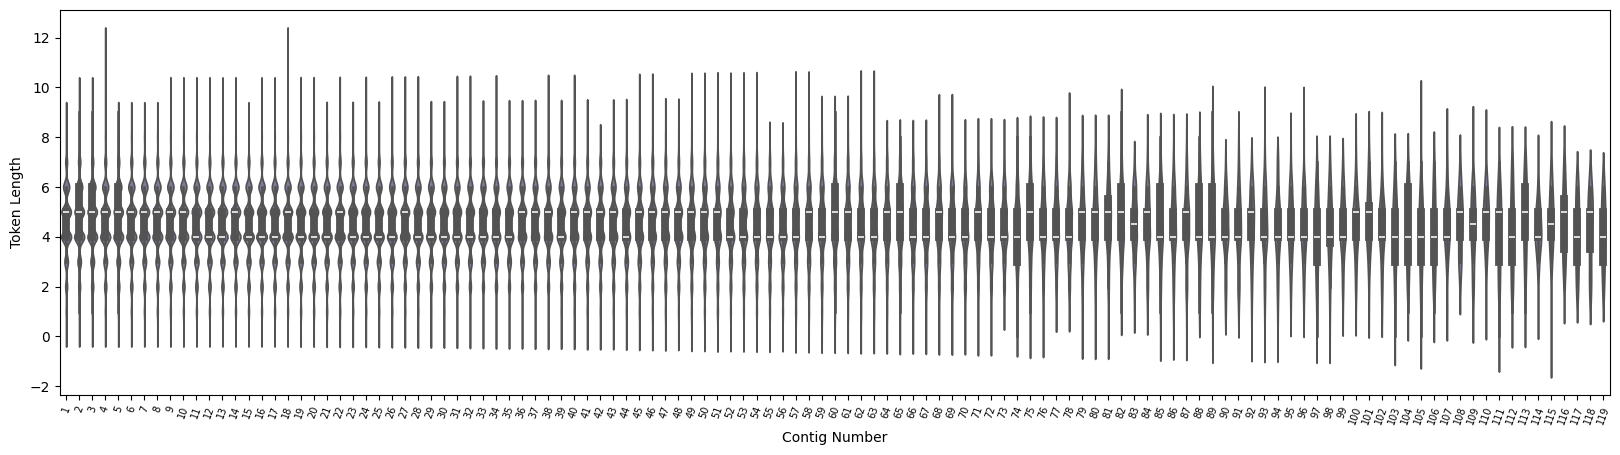

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(20,5))

ax = sns.violinplot(data=bedDf, x='contig_id', y='token_length', color='#8174A0')

plt.xlabel('Contig Number')
plt.xticks(fontsize=7, rotation=70)
plt.ylabel('Token Length')

plt.show()

<Axes: xlabel='token_length', ylabel='contig_id'>

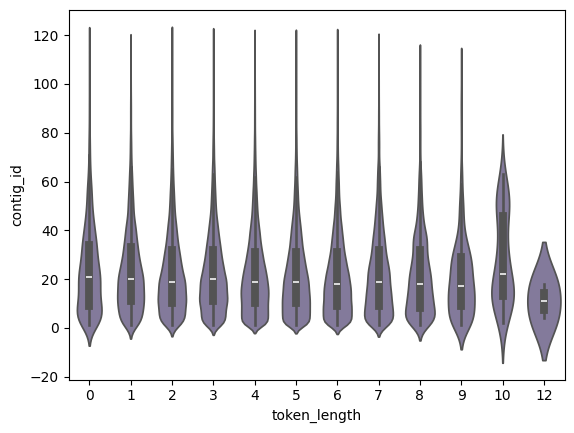

In [7]:
import seaborn as sns


sns.violinplot(data=bedDf, x='token_length', y='contig_id', color='#8174A0')